In [1]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter=200, lr=0.001, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.support_l = np.array([])
        self.support_y = np.array([])
        self.support_v = np.array([])
        self.form = np.array([[]])
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        self.lam = np.random.rand(X.shape[0])*1
        for ite in range(self.iter):
            X_m = self.ker(X, X.T)
            xy_m = y*np.sum(y*self.lam*X_m, axis=1)        
            self.lam += self.lr*(1 - xy_m)
            self.lam = np.where(self.lam<0, 0, self.lam)
            
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print("iter{}".format(iter+1))
        
        
        l_idx = np.where(self.lam >= self.threshold, self.lam, 0) != 0
        self.support_l = self.lam[l_idx==True]
        self.support_y = y[l_idx==True]
        self.support_v = X[l_idx==True]
        
    def ker(self, x1, x2, gamma=0.5, theta=10, d=3):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'poly':            
            return gamma*(np.dot(x1, x2) + theta)**d
    
    def inner_product(self, x1, x2):
        return np.dot(x1, x2)
            
            
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """ 
        x_v = self.ker(X, self.support_v.T)
        l_y = self.support_l * self.support_y
        total = self.inner_product(l_y.T, x_v.T)
        total = np.where(total>0, 1, -1)
        return total

# 問１〜問３

上記にて

# 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [2]:
import numpy as np
np.random.seed(seed=0)
n_samples = 200
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [3]:
ssvm = ScratchSVMClassifier()
ssvm.fit(X, y)

In [4]:
len(ssvm.support_l)

6

In [5]:
ssvm.lam

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07691172, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02989177, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
pred = ssvm.predict(X)

In [7]:
print(np.sum(pred==y)/len(y))

1.0


In [8]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X_val = np.concatenate((f0, f1))
y_val = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X_val = X_val[random_index]
y_val = y_val[random_index]

In [9]:
pred = ssvm.predict(X_val)

In [10]:
print(np.sum(y_val==pred)/len(y_val))

1.0


# 【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, support_v, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(support_v[:, 0], support_v[:, 1], color='yellow')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

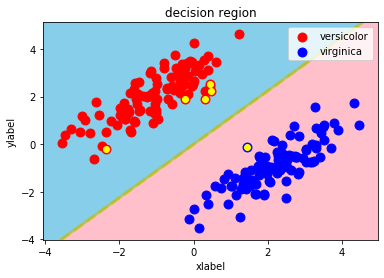

In [12]:
decision_region(X, y, ssvm, ssvm.support_v)

# 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。


「線形カーネルの式」

$$
k
(
x
i
,
x
j
)
=
x
T
i
x
j
$$
「多項式カーネルの式」

$$
k
(
x
i
,
x
j
)
=
γ
(
x
T
i
x
j
+
θ
0
)
d
$$
$$
γ
, 
θ
0
, 
d
$$
 はハイパーパラメータです。


線形カーネルは 
γ
=
1
, 
θ
0
=
0
, 
d
=
1
の場合の多項式カーネルと等しいと言えます。

In [13]:
ssvm = ScratchSVMClassifier(kernel='poly', lr=0.000001)
ssvm.fit(X, y)

In [14]:
len(ssvm.support_l)

13

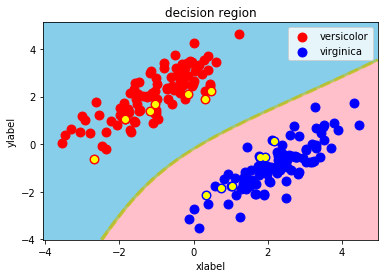

In [15]:
decision_region(X, y, ssvm, ssvm.support_v)